In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("final_clean.csv")
df.head(3)

,name,categories,city,state,postalCode,latitude,longitude
0,90 Miles Cuban Cafe,Ethnic,Chicago,IL,60618,41.937897,-87.685781
1,A's Ace Burgers,Burger,Dana Point,CA,92629,33.464500,-117.684500
2,A&W/Long John Silvers,Seafood,Belle Vernon,PA,15012,40.136482,-79.842820


(-1.1166585923484087,
 1.1007932663023052,
 -1.1047363054695014,
 1.113423675390096)

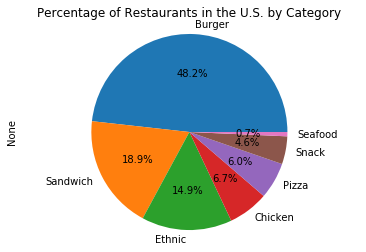

In [291]:
# Burgers are America's best seller
df.groupby("categories").size().nlargest(7).plot(kind = "pie", autopct="%1.1f%%", 
                                                title = "Percentage of Restaurants in the U.S. by Category")\
                                            .axis("equal")

In [110]:
# Cross-tabulation showing number of restaurants by type and state
category_df = pd.crosstab(df["state"], df["categories"], margins = True)
category_df.head()

categories,Burger,Chicken,Ethnic,Pizza,Sandwich,Seafood,Snack,All
state,,,,,,,,
AK,3,0,4,1,6,0,1,15
AL,2,1,3,0,0,0,0,6
AR,47,7,18,6,18,2,3,101
AZ,148,15,73,31,48,2,12,329
CA,615,70,214,78,112,2,67,1158


In [111]:
# Turning the cross-tab into proportions; adding margins gives the marginal total
proportions = pd.crosstab(df["state"], df["categories"], margins = True, normalize = True)
proportions.head()

categories,Burger,Chicken,Ethnic,Pizza,Sandwich,Seafood,Snack,All
state,,,,,,,,
AK,0.000307,0.000000,0.000409,0.000102,0.000614,0.000000,0.000102,0.001535
AL,0.000205,0.000102,0.000307,0.000000,0.000000,0.000000,0.000000,0.000614
AR,0.004811,0.000716,0.001842,0.000614,0.001842,0.000205,0.000307,0.010338
AZ,0.015148,0.001535,0.007472,0.003173,0.004913,0.000205,0.001228,0.033675
CA,0.062948,0.007165,0.021904,0.007984,0.011464,0.000205,0.006858,0.118526


In [112]:
# In our dataset, California has the highest proportion of restaurants, at 0.12 (or 12% of all restaurants
# in the dataset). Texas has 8% of all restaurants in the dataset.
proportions.sort_values(by = "All", ascending = False).head(3)

categories,Burger,Chicken,Ethnic,Pizza,Sandwich,Seafood,Snack,All
state,,,,,,,,
All,0.482395,0.066735,0.149028,0.060184,0.188741,0.007062,0.045855,1.000000
CA,0.062948,0.007165,0.021904,0.007984,0.011464,0.000205,0.006858,0.118526
TX,0.041453,0.010747,0.010850,0.002968,0.011157,0.000716,0.004094,0.081986


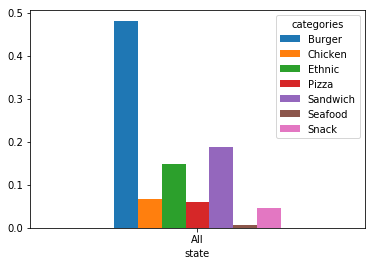

In [113]:
# Bar chart of proportions by category (this matches pie chart)
proportions.sort_values(by = "All", ascending = False).head(1).reset_index()\
        .drop(columns = "All").set_index("state").plot(kind = "bar", rot = 0)

In [30]:
# Extracting rows where name is Chick-Fil-A and pulling five largest states
Chick = df[df["name"] == "Chick-Fil-A"].groupby("state").size().nlargest()

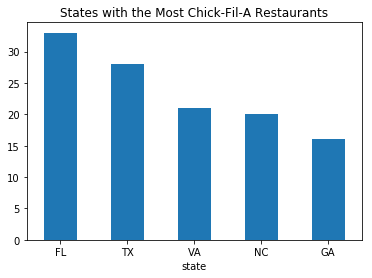

In [292]:
# States with the most Chick-Fil-A restaurants
Chick.reset_index().sort_values(by = 0, ascending = False).set_index("state")\
        .rename(columns = {0: "Chick-Fil-A"})\
        .plot(kind = "bar", rot = 0, title = "States with the Most Chick-Fil-A Restaurants",
             legend = False)

In [117]:
# New dataframe that has proportions of restaurant type within state (as opposed to nationally)
state_prop = pd.crosstab(df["state"], df["categories"], margins = True, 
                          normalize = "index")
state_prop.head(3)

categories,Burger,Chicken,Ethnic,Pizza,Sandwich,Seafood,Snack
state,,,,,,,
AK,0.200000,0.000000,0.266667,0.066667,0.400000,0.000000,0.066667
AL,0.333333,0.166667,0.500000,0.000000,0.000000,0.000000,0.000000
AR,0.465347,0.069307,0.178218,0.059406,0.178218,0.019802,0.029703


In [41]:
# The five states whose proportion of pizza is the largest
Pizza = state_prop.sort_values(by = "Pizza", ascending = False).head()

In [42]:
Pizza

categories,Burger,Chicken,Ethnic,Pizza,Sandwich,Seafood,Snack
state,,,,,,,
RI,0.333333,0.000000,0.133333,0.266667,0.200000,0.000000,0.000000
NM,0.532468,0.038961,0.220779,0.142857,0.051948,0.012987,0.000000
WY,0.344828,0.000000,0.068966,0.137931,0.310345,0.000000,0.103448
MT,0.342105,0.000000,0.289474,0.131579,0.210526,0.000000,0.026316
ND,0.314286,0.028571,0.285714,0.114286,0.257143,0.000000,0.000000


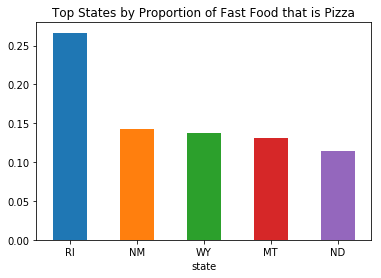

In [51]:
Pizza["Pizza"].plot(kind = "bar", rot = 0, title = "Top States by Proportion of Fast Food that is Pizza")

In [59]:
# Top 5 states in proportion of restaurants within state that are burger restaurants
Burger = state_prop.sort_values(by = "Burger", ascending = False).head()
Burger

categories,Burger,Chicken,Ethnic,Pizza,Sandwich,Seafood,Snack
state,,,,,,,
HI,0.843750,0.000000,0.062500,0.031250,0.000000,0.00,0.031250
VT,0.733333,0.000000,0.066667,0.000000,0.133333,0.00,0.000000
OR,0.610390,0.006494,0.116883,0.032468,0.175325,0.00,0.058442
ME,0.600000,0.000000,0.160000,0.080000,0.080000,0.04,0.040000
LA,0.549505,0.103960,0.133663,0.084158,0.103960,0.00,0.014851


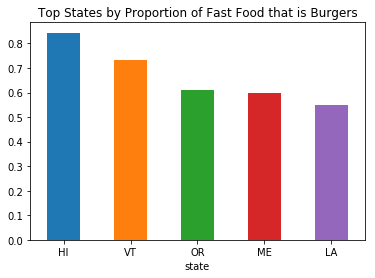

In [60]:
Burger["Burger"].plot(kind = "bar", rot = 0, title = "Top States by Proportion of Fast Food that is Burgers")

In [61]:
# Top five states by proportion of "ethic" restaurants
Ethnic = state_prop.sort_values(by = "Ethnic", ascending = False).head()
Ethnic

categories,Burger,Chicken,Ethnic,Pizza,Sandwich,Seafood,Snack
state,,,,,,,
AL,0.333333,0.166667,0.500000,0.000000,0.000000,0.000000,0.000000
MO,0.398773,0.006135,0.312883,0.030675,0.208589,0.006135,0.012270
NV,0.471074,0.024793,0.297521,0.049587,0.132231,0.008264,0.016529
MT,0.342105,0.000000,0.289474,0.131579,0.210526,0.000000,0.026316
ND,0.314286,0.028571,0.285714,0.114286,0.257143,0.000000,0.000000


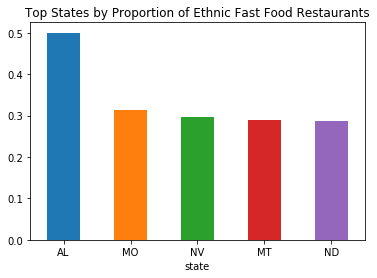

In [69]:
Ethnic["Ethnic"].plot(kind = "bar", rot = 0, title = "Top States by Proportion of Ethnic Fast Food Restaurants")

In [63]:
# Top 5 states in proportion of restaurants within state that are chicken restaurants
Chicken = state_prop.sort_values(by = "Chicken", ascending = False).head()
Chicken 

categories,Burger,Chicken,Ethnic,Pizza,Sandwich,Seafood,Snack
state,,,,,,,
AL,0.333333,0.166667,0.500000,0.000000,0.000000,0.000000,0.000000
NC,0.450847,0.138983,0.074576,0.084746,0.216949,0.003390,0.020339
TX,0.501238,0.129950,0.131188,0.035891,0.134901,0.008663,0.049505
VA,0.383399,0.122530,0.122530,0.051383,0.292490,0.000000,0.023715
SC,0.481283,0.117647,0.074866,0.042781,0.224599,0.000000,0.053476


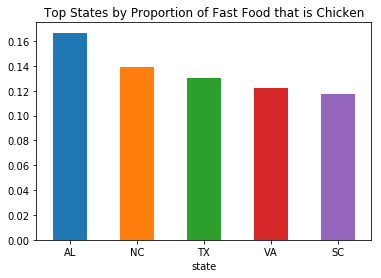

In [68]:
Chicken["Chicken"].plot(kind = "bar", rot = 0, title = "Top States by Proportion of Fast Food that is Chicken")

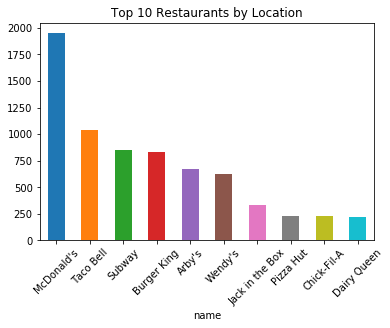

In [118]:
# Ten largest restaurants in our dataset by number of locations
df.groupby("name")["categories"].size().nlargest(10).plot(kind = "bar", 
                                                          rot = 45,
                                                         title = "Top 10 Restaurants by Location")

In [70]:
# Restaurants that fall into the "chicken" category
cat_chicken = df[df["categories"] == "Chicken"]
cat_chicken.head()

,name,categories,city,state,postalCode,latitude,longitude
13,Ani's Chicken,Chicken,Montebello,CA,90640,34.018116,-118.105300
806,Bojangles' Famous Chicken 'n Biscuits,Chicken,Hiram,GA,30141,33.890714,-84.750513
807,Bojangles' Famous Chicken 'n Biscuits,Chicken,Fayetteville,NC,28304,35.026886,-79.052482
808,Bojangles' Famous Chicken 'n Biscuits,Chicken,Irmo,SC,29063,34.095532,-81.159696
809,Bojangles' Famous Chicken 'n Biscuits,Chicken,Shelby,NC,28152,35.282600,-81.556032


In [72]:
cat_chicken.groupby("name").size().nlargest(10)

name
Chick-Fil-A                              228
KFC                                      176
Boston Market                             42
Bojangles' Famous Chicken 'n Biscuits     32
Church's Chicken                          27
El Pollo Loco                             23
Golden Chick                              21
Popeye's Louisiana Kitchen                20
Chicken Express                           16
Raising Cane's                            12
dtype: int64

In [119]:
# Total number of chicken restaurants
count_chicken = cat_chicken.groupby("name")["name"].count()
count_chicken.sum()

652

In [77]:
# Proportion of chicken restaurants in our dataset that are Chick-Fil-A
228/652

0.3496932515337423

In [90]:
count_chicken.head()

name
Ani's Chicken                             1
Bojangles' Famous Chicken 'n Biscuits    32
Boston Market                            42
Bush's Chicken                            2
California Chicken Cafe                   1
Name: name, dtype: int64

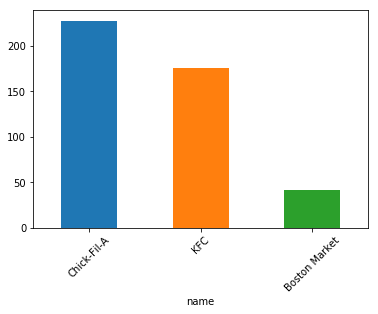

In [97]:
# Three largest chicken restaurants
count_chicken.nlargest(3).plot(kind = "bar", rot = 45)

(-1.1202385146209588,
 1.1009637387914741,
 -1.1022558197565537,
 1.1059915261184805)

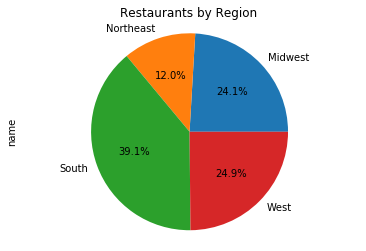

In [106]:
df.groupby("region")["name"].count().plot(kind = "pie", autopct="%1.1f%%",
                                         title = "Restaurants by Region").axis("equal")

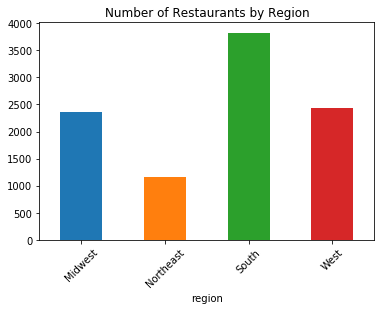

In [269]:
df.groupby("region")["name"].count().plot(kind = "bar", rot = 45, 
                                          title = "Number of Restaurants by Region")

In [120]:
cat_ethnic = df[df["categories"] == "Ethnic"]
cat_ethnic.head()

,name,categories,city,state,postalCode,latitude,longitude,region
0,90 Miles Cuban Cafe,Ethnic,Chicago,IL,60618,41.937897,-87.685781,Midwest
4,Acropolis Gyro Palace,Ethnic,Columbus,OH,43214,40.071324,-83.018535,Midwest
5,Adobe Cantina Salsa,Ethnic,Hammond,LA,70401,30.501010,-90.480980,South
683,Au Bon Pain,Ethnic,Philadelphia,PA,19103,39.953602,-75.173279,Northeast
697,Baja Fresh Mexican Grill,Ethnic,Encinitas,CA,92024,33.049628,-117.260182,West


In [121]:
cat_ethnic.groupby("name").size().nlargest(10)

name
Taco Bell                 1036
Del Taco                    66
Panda Express               62
Taco John's                 53
Chipotle Mexican Grill      33
Taco Time                   24
Taco Bueno                  22
Moe's Southwest Grill       13
Pei Wei                     10
QDOBA Mexican Eats           8
dtype: int64

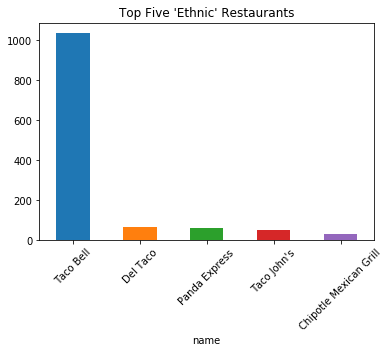

In [175]:
cat_ethnic.groupby("name").size().nlargest().plot(kind = "bar", rot = 45,
                                                 title = "Top Five 'Ethnic' Restaurants")

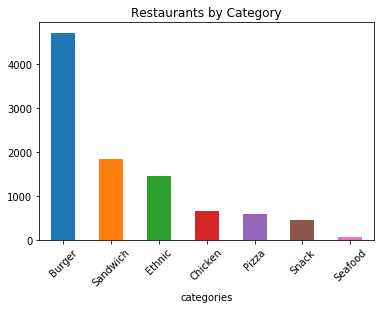

In [133]:
df.groupby("categories")["region"].size().nlargest(7).plot(kind = "bar",
                                                          rot = 45, 
                                                          title = "Restaurants by Category")

In [134]:
South = df[df["region"] == "South"]

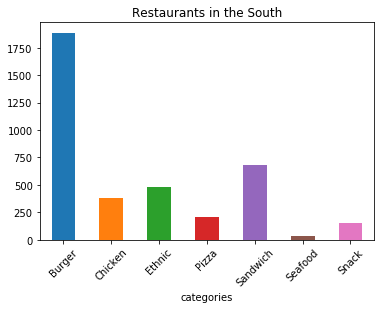

In [143]:
South.groupby("categories").size().plot(kind = "bar", title = "Restaurants in the South", rot = 45)

In [144]:
Northeast = df[df["region"] == "Northeast"]

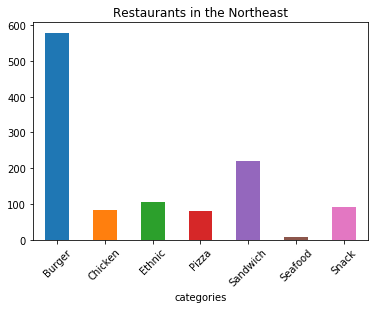

In [146]:
Northeast.groupby("categories").size().plot(kind = "bar", title = "Restaurants in the Northeast", rot = 45)

In [156]:
West = df[df["region"] == "West"]

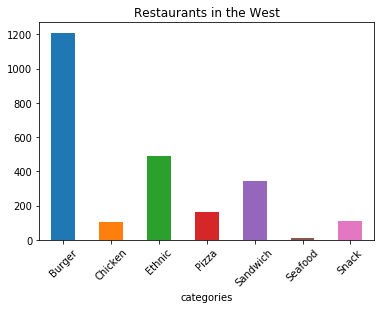

In [158]:
West.groupby("categories").size().plot(kind = "bar", title = "Restaurants in the West", rot = 45)

In [159]:
Midwest = df[df["region"] == "Midwest"]

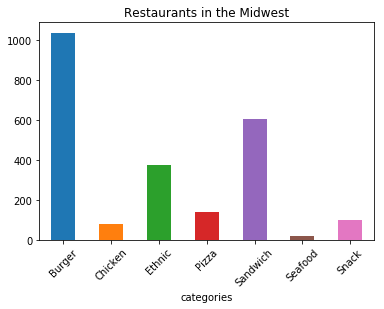

In [160]:
Midwest.groupby("categories").size().plot(kind = "bar", title = "Restaurants in the Midwest", rot = 45)

In [163]:
cat_burger = df[df["categories"] == "Burger"]

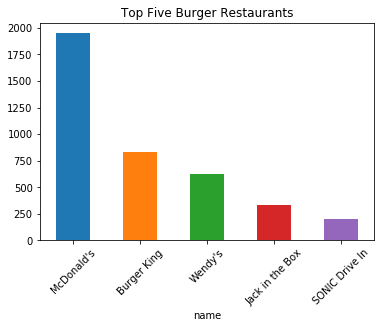

In [168]:
cat_burger.groupby("name").size().nlargest().plot(kind = "bar", rot = 45,
                                                 title = "Top Five Burger Restaurants")

In [169]:
cat_sandwich = df[df["categories"] == "Sandwich"]

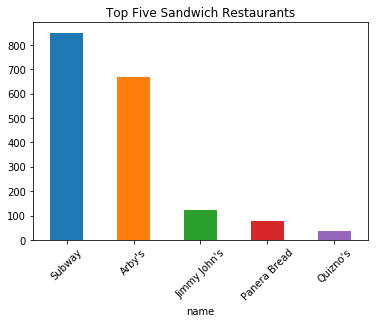

In [170]:
cat_sandwich.groupby("name").size().nlargest().plot(kind = "bar", rot = 45,
                                                 title = "Top Five Sandwich Restaurants")

In [171]:
cat_seafood = df[df["categories"] == "Seafood"]

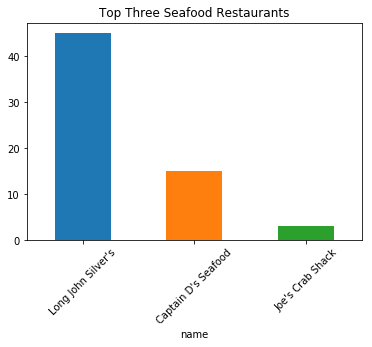

In [174]:
cat_seafood.groupby("name").size().nlargest(3).plot(kind = 'bar', rot = 45,
                                                   title = "Top Three Seafood Restaurants")

In [182]:
regions_df = pd.crosstab(df["region"], df["categories"], margins = True)
regions_df.head()

categories,Burger,Chicken,Ethnic,Pizza,Sandwich,Seafood,Snack,All
region,,,,,,,,
Midwest,1038,81,375,137,605,19,97,2352
Northeast,579,83,105,81,221,7,93,1169
South,1887,383,485,205,677,34,150,3821
West,1209,105,491,165,341,9,108,2428
All,4713,652,1456,588,1844,69,448,9770


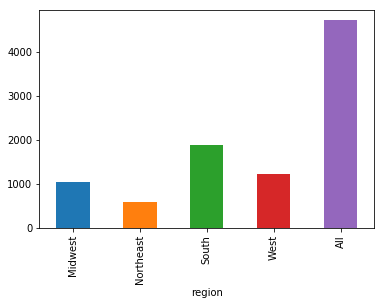

In [185]:
regions_df["Burger"].plot(kind = 'bar')

In [179]:
regions_df.drop(columns = "All", inplace = True)

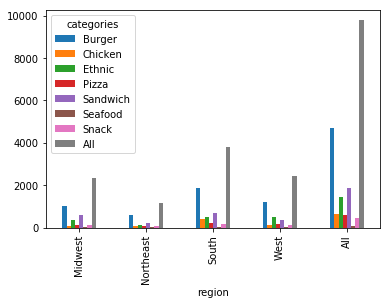

In [187]:
regions_df.plot(kind = "bar")

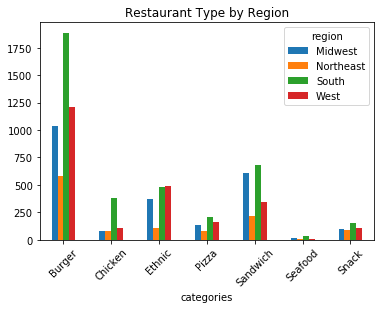

In [214]:
df.groupby(['categories','region']).size().unstack().plot(kind = 'bar', 
#                                                           stacked = True,
                                                         title = "Restaurant Type by Region",
                                                         rot = 45)

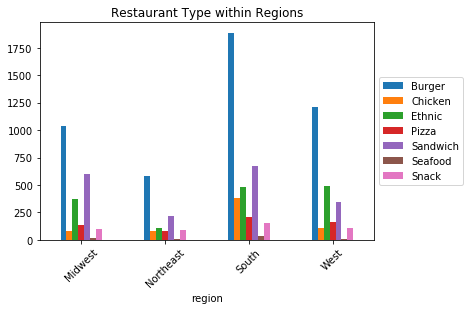

In [245]:
df.groupby(['region', 'categories']).size().unstack().plot(kind = 'bar', 
#                                                           stacked = True,
                                                         title = "Restaurant Type within Regions",
                                                         rot = 45, legend = False)\
        .legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


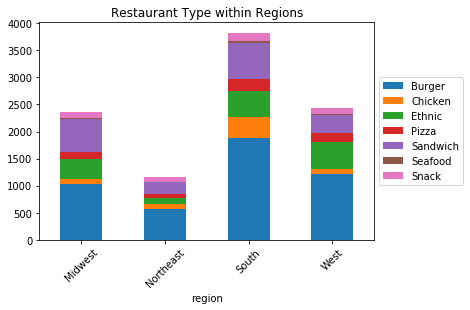

In [246]:
df.groupby(['region', 'categories']).size().unstack().plot(kind = 'bar', 
                                                          stacked = True,
                                                         title = "Restaurant Type within Regions",
                                                         rot = 45, legend = False)\
        .legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

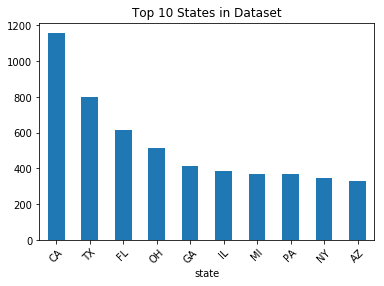

In [243]:
df.groupby("state").size().nlargest(10).reset_index().sort_values(by = 0, ascending = False)\
        .set_index("state").plot(kind = "bar", rot = 45, legend = False, 
                                 title = "Top 10 States in Dataset")

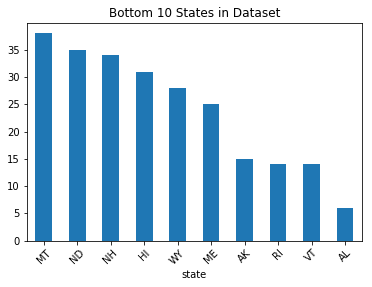

In [244]:
df.groupby("state").size().nsmallest(10).reset_index().sort_values(by = 0, ascending = False)\
        .set_index("state").plot(kind = "bar", rot = 45, legend = False, 
                                 title = "Bottom 10 States in Dataset")

In [253]:
AL = df[df["state"] == "AL"]

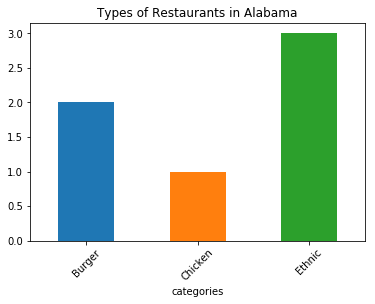

In [257]:
AL.groupby("categories").size().plot(kind = "bar", title = "Types of Restaurants in Alabama", rot = 45)

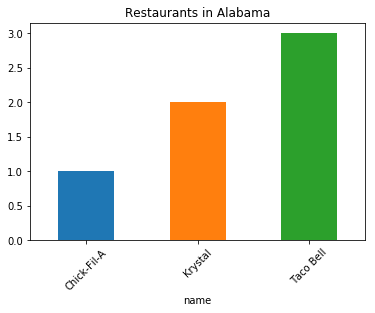

In [268]:
AL.groupby("name").size().plot(kind = "bar", 
                               title = "Restaurants in Alabama",
                              rot = 45)

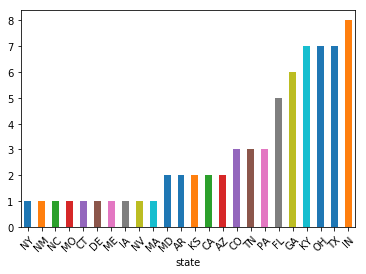

In [278]:
cat_seafood.groupby("state").size().nsmallest(25).plot(kind = "bar", 
                                                       rot = 45,
                                                      title = "")

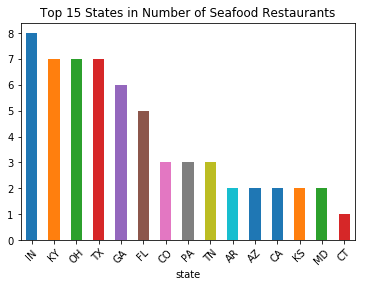

In [286]:
# Bottom half have zero seafood restaurants, so only 25 states have even one in the dataset
cat_seafood.groupby("state").size().nlargest(15).plot(kind = "bar", 
                                                       rot = 45,
                                                      title = "Top 15 States in Number of Seafood Restaurants")